In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [16]:
order_new = pd.read_pickle('./datas/order_merged_info3.pkl')
grouped_df = order_new.groupby(["department"])["reordered"].aggregate("mean").reset_index()
grouped_df = grouped_df.sort_values('reordered', ascending=False)


In [17]:
grouped_df.head()

,department,reordered
7,dairy eggs,0.670161
3,beverages,0.653651
19,produce,0.650521
2,bakery,0.628381
8,deli,0.608130


/Users/carly/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


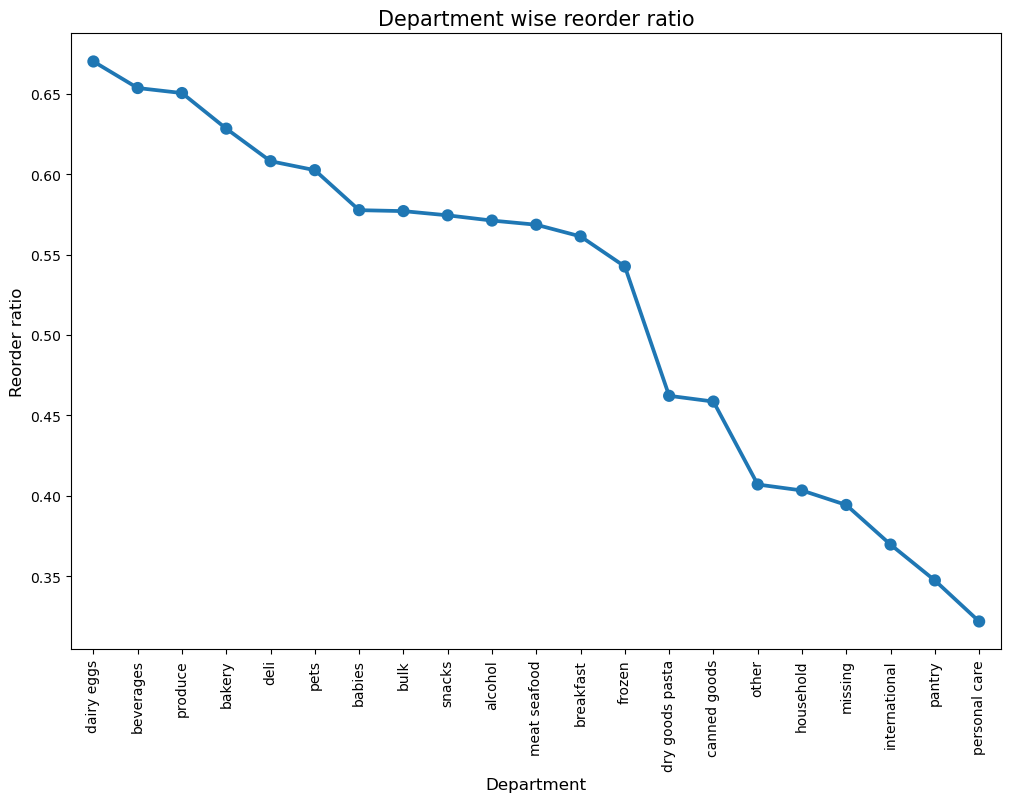

In [18]:
plt.figure(figsize=(12,8))
sns.pointplot(grouped_df['department'].values, grouped_df['reordered'].values, alpha=0.8)
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Department', fontsize=12)
plt.title("Department wise reorder ratio", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

In [19]:
order_new["add_to_cart_order_mod"] = order_new["add_to_cart_order"].copy()
order_new
grouped_df = order_new.groupby(["add_to_cart_order_mod"])["reordered"].aggregate("sum").reset_index()
grouped_df

,add_to_cart_order_mod,reordered
0,1.0,2273000.0
1,2.0,2154976.0
2,3.0,1967461.0
3,4.0,1767415.0
4,5.0,1570409.0
...,...,...
140,141.0,0.0
141,142.0,0.0
142,143.0,0.0
143,144.0,0.0


/Users/carly/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


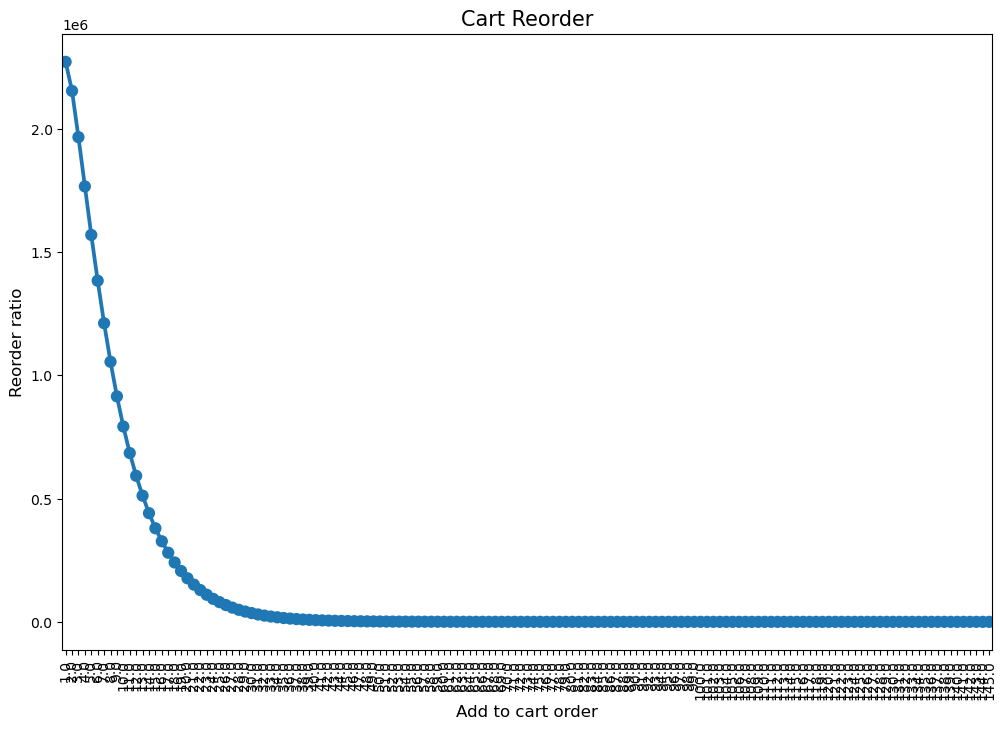

In [21]:
plt.figure(figsize=(12,8))
sns.pointplot(grouped_df['add_to_cart_order_mod'].values, grouped_df['reordered'].values, alpha=0.8)
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Add to cart order', fontsize=12)
plt.title("Cart Reorder", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

/var/folders/sw/ypsqlfts35lf8nn7vytq_t100000gn/T/ipykernel_4158/295319172.py:3: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  cart = order_new[{'order_real_count', 'reordered'}]


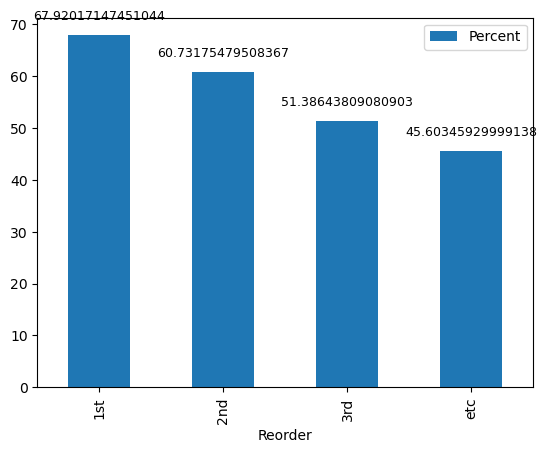

In [33]:
order_new = pd.read_pickle('./remake.pkl')

cart = order_new[{'order_real_count', 'reordered'}]

first_cart = cart[(cart['order_real_count'] == 1)].count()
first_cart_reorder = len(cart[(cart['order_real_count'] == 1) & (cart['reordered'] == 1)])
second_cart = cart[(cart['order_real_count'] == 2)].count()
second_cart_reorder = len(cart[(cart['order_real_count'] == 2) & (cart['reordered'] == 1)])
third_cart = cart[(cart['order_real_count'] == 3)].count()
third_cart_reorder = len(cart[(cart['order_real_count'] == 3) & (cart['reordered'] == 1)])
fourth_cart = cart[(cart['order_real_count'] >= 20)].count()
fourth_cart_reorder = len(cart[(cart['order_real_count'] >= 20) & (cart['reordered'] == 1)])

df = pd.DataFrame({
    'Reorder' : ['1st', '2nd', '3rd', 'etc'],
    'Percent' : [first_cart_reorder / first_cart[1] * 100, 
                 second_cart_reorder / second_cart[1] * 100,
                 third_cart_reorder / third_cart[1] * 100,
                 fourth_cart_reorder / fourth_cart[1] * 100]
})

plot = df.plot(x = "Reorder", y = "Percent", kind="bar")
for p in plot.patches:
    height = p.get_height()
    plot.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 9)



In [49]:
product = order_new[{'product_name', 'order_real_count'}]
product = product[product['order_real_count'] == 1]

product = product.groupby(['product_name'])['product_name'].count()
product = product.sort_values(ascending = False)
product = product[:10]
print(product)
plt.figure(figsize=(15,5))
sns.countplot(product['product_name'])
plt.show()

/var/folders/sw/ypsqlfts35lf8nn7vytq_t100000gn/T/ipykernel_4158/3742509589.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  product = order_new[{'product_name', 'order_real_count'}]


product_name
Banana                    29169
Bag of Organic Bananas    21567
Organic Whole Milk         7997
Organic Strawberries       7548
Organic Hass Avocado       6424
Organic Baby Spinach       6300
Organic Avocado            6026
Spring Water               4614
Strawberries               4395
Organic Raspberries        3808
Name: product_name, dtype: int64


KeyError: 'product_name'

<Figure size 1500x500 with 0 Axes>